### Introduction
Python has large ecosystem which has made it unique to work for software development and data analysis. It has enormous packages
to build almost anything. One of them is called 'folium'. 

According to the documentation, Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate data in Python, then visualize it in on a Leaflet map via Folium.

Folium makes it easy to visualize data that’s been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

The library has a number of built-in tilesets from OpenStreetMap, MapQuest Open, MapQuest Open Aerial, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

In this article, I will explore folium by visualizing certain companies and universities locations of Malaysia. 

### Project objective
The goals of this project are : 
- Gather data specially [geo_location] of Malaysia public universities.
- Use pandas to store data
- Wrangling collected data
- Doing Exploratory data analysis
- Applying Folium to create the map and visualize it

### Gathering data
Unfortunately, the geo-data of Malaysia Public Universities is not available in the internet. I search in the google dataset.
Couldn't found. So, I have done some web scrapping and collected the data I need.

Below is the dataset I have collected and put it in a Python list. As you can see it's a list of tuples. Each tuple contains id, university_name,
date of establishment, state, latitude and longitude.

In [1]:
public_university_malaysia = [
    
    ('UM', 'Universiti Malaya', '1-1-1962', 'Kuala Lumpur', 3.120101, 101.654396),
    ('USM', 'Universiti Sains Malaysia ', '1969', 'Penang', 5.355870, 100.296188),
    ('UKM', 'Universiti Kebangsaan Malaysia', '18-5-1970', 'Selangor', 2.930430,101.777328 ),
    ('UPM', 'Universiti Putra Malaysia', '4-10-1971', 'Selangor', 3.010720, 101.720909),
    ('UTM', 'Universiti Teknologi Malaysia', '1-4-1975', 'Johor', 1.559580, 103.637489),
    ('UiTM', 'Universiti Teknologi MARA', '26-8-1999', 'Selangor', 3.0676, 101.4992),
    ('UIAM', 'Universiti Islam Antarabangsa Malaysia', '10-5-1983', 'Selangor', 3.248900,101.777328 ),
    ('UUM', 'Universiti Utara Malaysia', '16-2-1984', 'Kedah', 6.457510, 100.505432),
    ('UNIMAS', 'Universiti Malaysia Sarawak', '24-12-1992', 'Sarawak', 1.464922, 110.426855),
    ('UMS', 'Universiti Malaysia Sabah', '24-11-1994', 'Sabah', 6.042670, 116.147560),
    ('UPSI', 'Universiti Pendidikan Sultan Idris', '24-2-1997', 'Perak', 3.685048, 101.524094),
    ('USIM', 'Universiti Sains Islam Malaysia', '13-3-1998', 'Negeri Sembilan', 2.844204, 101.781890),
    ('UMT', 'Universiti Malaysia Terengganu', '15-7-1999', 'Terengganu', 5.408712, 103.088813),
    ('UTHM', 'Universiti Tun Hussein Onn Malaysia', '30-9-2000', 'Johor', 1.858626, 103.085578),
    ('UTeM', 'Universiti Teknikal Malaysia Melaka', '1-12-2000', 'Melaka', 2.306000, 102.317871),
    ('UMP', 'Universiti Malaysia Pahang', '16-2-2002', 'Pahang', 3.543702, 103.428906),
    ('UniMAP', 'Universiti Malaysia Perlis', '2-5-2002', 'Perlis', 6.411160, 100.135600),
    ('UniSZA', 'Universiti Sultan Zainal Abidin', '1-1-2006', 'Terengganu', 5.395676, 103.082795),
    ('UMK', 'Universiti Malaysia Kelantan', '14-6-2006', 'Kelantan', 6.164291, 102.283956),
    ('UPNM', 'Universiti Pertahanan Nasional Malaysia', '10-11-2006', 'Kuala Lumpur', 3.050463, 101.724833),

]

I will be using pandas, pyplot for EDA (exploratory data analysis) and data wrangling. Finally, I will visualize it using folium which is my
ultimate goal for this project. I am importing the modules I need as follows.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In order to analyze our data with pandas I need convert to our list data into pandas dataframe. It can be done by using pandas DataFrame()
function. Below I am passing columns name and our list I created earlier inside of this this function.

In [3]:
columns_name = ['Id', 'University_Name', 'Date_Established', 'State', 'Latitude', 'Longitude' ]
df_public_university_malaysia = pd.DataFrame(data = public_university_malaysia,
                      columns=columns_name)

### Wrangling
Now that our dataset has been created properly. I can have a look into it by using pandas head() method. Also I am trying to 
determine any missing value within the dataset. Even if the dataset is small but I need to make sure all data is present in order to
visualize it with folium and to avaoid unexpected output.

In [4]:
df_public_university_malaysia.head()

,Id,University_Name,Date_Established,State,Latitude,Longitude
0,UM,Universiti Malaya,1-1-1962,Kuala Lumpur,3.120101,101.654396
1,USM,Universiti Sains Malaysia,1969,Penang,5.355870,100.296188
2,UKM,Universiti Kebangsaan Malaysia,18-5-1970,Selangor,2.930430,101.777328
3,UPM,Universiti Putra Malaysia,4-10-1971,Selangor,3.010720,101.720909
4,UTM,Universiti Teknologi Malaysia,1-4-1975,Johor,1.559580,103.637489


In [5]:
df_public_university_malaysia.isnull().sum()

Id                  0
University_Name     0
Date_Established    0
State               0
Latitude            0
Longitude           0
dtype: int64

Now I am confirmed that our dataset has no missing value in it. I will proceed to next step which is EDA. In that step I will
try to find any pattern and insightful info of our data.

### EDA
Our dataset is small and has only two columns which contain numerical values. Let's see what can be found. 
Below I am scattering latitude (as x axis) and longitude (as y axis). 

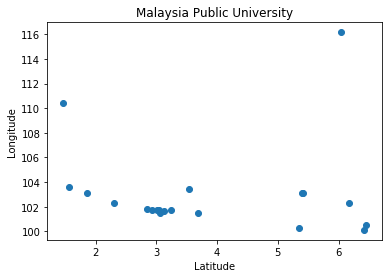

In [6]:
plt.title("Malaysia Public University")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.scatter(df_public_university_malaysia.Latitude, df_public_university_malaysia.Longitude)
plt.show()

The scatter plot indicate that within latitude: 3 and longitude: 102 and so, few universities are in that region. That
means there is a certain state where more public universities are available than other states. Let's find it out by using pandas
groupby() and counts() methods. 

In [7]:
df_public_university_malaysia.groupby('State').count().University_Name

State
Johor              2
Kedah              1
Kelantan           1
Kuala Lumpur       2
Melaka             1
Negeri Sembilan    1
Pahang             1
Penang             1
Perak              1
Perlis             1
Sabah              1
Sarawak            1
Selangor           4
Terengganu         2
Name: University_Name, dtype: int64

Ok that is interesting. We can see that Selangor state has 4 public universities. The reason can be, in that state population is
high and so on. Anyways, this is not my concern for this project. I am moving to my final state of this project.

### Using folium

In [8]:
# creating the map
uni_map = folium.Map(location=[1.559580, 103.637489], zoom_start=6)
df_public_university_malaysia.apply(lambda pu:folium.Marker(location=[pu["Latitude"], pu["Longitude"]], 
                                               popup = pu["University_Name"])
                                             .add_to(uni_map), axis=1)

# display th map
uni_map

The map is pretty much beautiful. Isn't it? Among them one of it is my own university.

That's all for this project. You can find this repository here : 
I keep the project and dataset open source (MIT license). So that anyone can use and enrich the dataset for further
analysis.